# Shrinkage models in scikit-learn

Shrinkage models represent a popular alternative to classical linear models.<br>
They extend the standard linear model by introducing model controlled bias.<br>
The Ridge Regression Model is one example which adds a penalty to the sum of squared errors.<br>
By adding some bias we do not have the best linear unbiased estimator anymore (like in OLS)

## How do we evaluate Shrinkage Models?

In Shrinkage Models, coefficients are shrunk toward zero and each other.<br>
Hence:
* Find the optimal value of alpha
* We need to centre and scale the indpendent variables so that ridge solutions are equivalent under scaling of inputs
* Estimated Shrinkage Coefficients are less variable than the ones you would obtain in standard regression

In [4]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Daniel Ho\DFE-DATA4\DFE Data Engineering Next Steps\scikit_data\boston.csv')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import Ridge

We set the argument normaliser equalt to `True` to avoid an unfair shrinkage effect.

In [10]:
ridge = Ridge(normalize=True)
ridge.fit(X_train, y_train)

C:\Users\Daniel Ho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(normalize=True)

In [ ]:
ridge = Ridge(normalize=True)
ridge.fit(X_train, y_train)

C:\Users\Daniel Ho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(normalize=True)

In [11]:
y_pred = ridge.predict(X_test)

In [12]:
r2_train = ridge.score(X_train, y_train)

In [13]:
print(f'Training Performance: {r2_train}')

Training Performance: 0.6455308110733852


In [14]:
r2_test = ridge.score(X_test, y_test)

In [15]:
print(f'Training Performance: {r2_test}')

Training Performance: 0.613176118915375


In [20]:
import numpy as np
ridge = Ridge(normalize=True)
alphas = np.logspace(-3,3,10) # logspace values between -3 and 3, with 10 possible
coef = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coef.append(ridge.coef_)

C:\Users\Daniel Ho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Daniel Ho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a 

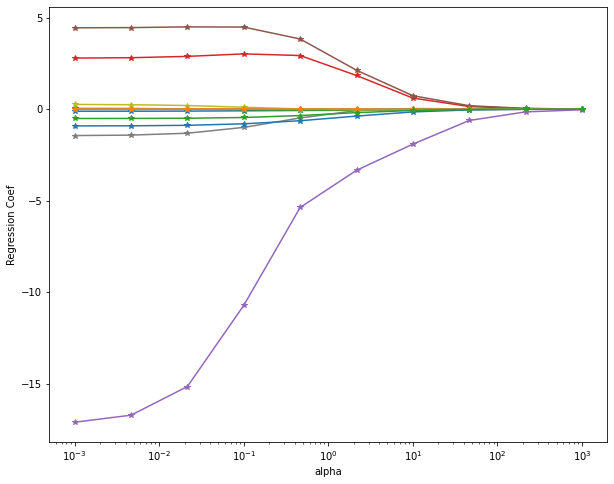

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(alphas, coef, marker='*')
ax.set_xlabel('alpha')
ax.set_ylabel('Regression Coef')
ax.set_xscale('log') # Since the alphas are in a logspace, we need to change the scale to logrithmic.
ax.set_xlim(ax.get_xlim())
plt.show()

# Why should we regularize the model?

Sometimes it is better to reduce bias in the model since it would penalise larger coefficients.<br>
More importantly, we are assigning equal weight to each single regression coefficient and if we perform this, it may happen that the estimation for each single regression coefficient has lower variability.

Previously we had a training performance of 0.64.<br>
This score was heavily dependant on the splitting procedure but also the alpha that was chosen to fit the model.<br>
By default, the alpha is set to 1, and the alpha is the parameter control of the regularisation.<br>
Therefore what we can do is perform a grid search cross-validation.<br>
This is cross validation but it is extended by allowing you to estimate the hyperparameter you are interested in as well.

For instance, we are interested in the alpha hyper parameter.

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 10)}
grid = GridSearchCV(ridge, param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

C:\Users\Daniel Ho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Daniel Ho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a 

GridSearchCV(cv=10, estimator=Ridge(alpha=1000.0, normalize=True),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             return_train_score=True)

In [25]:
grid.best_score_

0.6995263634539468

In [26]:
grid.best_params_

{'alpha': 0.021544346900318832}